<a href="https://colab.research.google.com/github/Ramts23/face-recognition-attendance/blob/main/cv_project_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# prerequisite

In [4]:
pip install face-recognition

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime
import pickle
import csv

# new student

In [43]:
new_name = input("enter name of the student:\t")
new_name = new_name+".jpeg"

enter name of the student:	Ram


In [44]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename=new_name, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to Ram.jpeg


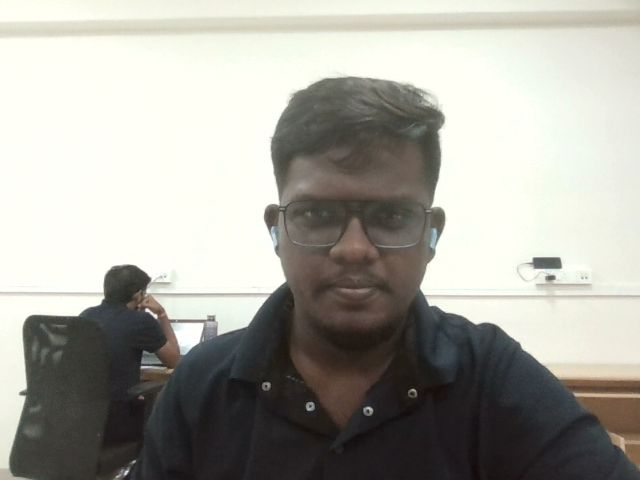

In [45]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [46]:
!mv {new_name} drive/MyDrive/student

# attendance

In [47]:
path = '/content/drive/MyDrive/student'

In [48]:
images = []
classNames = []
mylist = os.listdir(path)
for cl in mylist:
    curImg =   cv2.imread(f'{path}/{cl}')
    if curImg is not None:
      curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
    img_encode = face_recognition.face_encodings(curImg)[0]
    images.append(img_encode)
    classNames.append(os.path.splitext(cl)[0])

In [49]:
for cl in mylist:
    curImg =   cv2.imread(f'{path}/{cl}')

In [34]:
#new_name = "temp.jpeg"

In [50]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename=new_name, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to Ram.jpeg


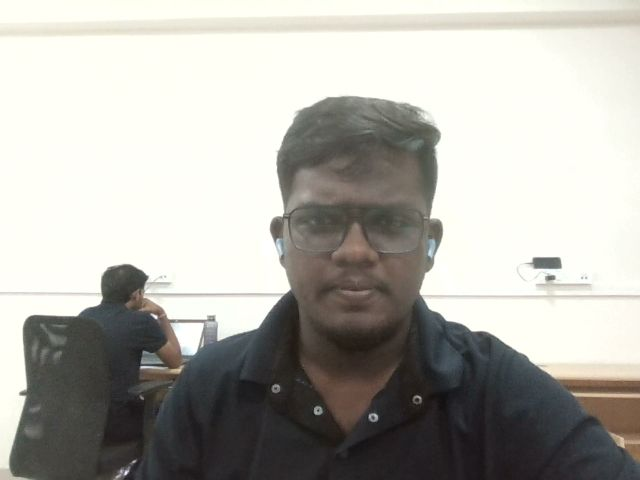

In [51]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [52]:
temp ='/content/temp.jpeg'

In [53]:
test = face_recognition.load_image_file(temp)
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
test_encode = face_recognition.face_encodings(test)[0]

In [54]:
results=[]
for im in images:
  print(face_recognition.compare_faces([im],test_encode))
  results.append(face_recognition.compare_faces([im],test_encode))

[False]
[False]
[False]
[False]
[True]
[True]


In [55]:
classNames

['elon', 'tim', 'satya', 'jasmine', 'temp', 'Ram']

In [41]:
for i in range(len(results)):
        if (results[i][0]== True):
            name = classNames[i]

In [42]:
name

'temp'

In [24]:
results

[[False], [False], [False], [False]]

In [25]:
import pandas as pd
from datetime import datetime
import os

def markAttendance(name, csv_file_path):
    now = datetime.now()
    time = now.strftime('%I:%M:%S %p')
    date = now.strftime('%d-%B-%Y')

    if os.path.exists(csv_file_path):
        df = pd.read_csv(csv_file_path)

        if name in df['Name'].values:
            df.loc[df['Name'] == name, ['Date', 'Time']] = [date, time]
        else:
            new_row = pd.DataFrame([[name, 'Present', date, time]], columns=['Name', 'Status', 'Date', 'Time'])
            df = pd.concat([df, new_row], ignore_index=True)
    else:
        df = pd.DataFrame([[name, 'Present', date, time]], columns=['Name', 'Status', 'Date', 'Time'])
    df.to_csv(csv_file_path, index=False)

In [26]:
csv_file_path = '/content/drive/MyDrive/attendance.csv'

In [56]:
markAttendance(name, csv_file_path)